In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('carprice_ass.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<Axes: xlabel='price', ylabel='Count'>

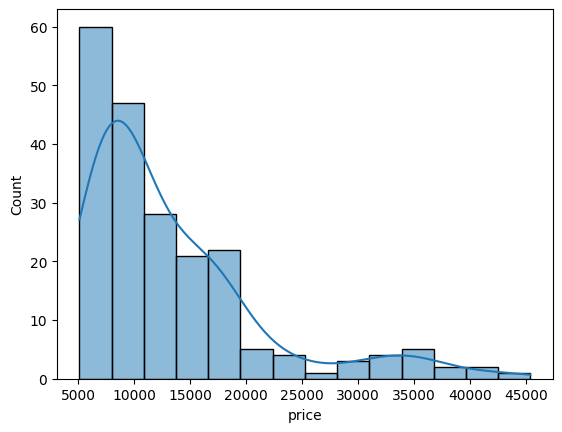

In [4]:
sns.histplot(data=df, x='price', kde=True)

In [8]:
df.describe()

,car_ID,symboling,fueltype,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.902439,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.297446,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,1.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.fueltype)
df.fueltype = le.transform(df.fueltype)

le.fit(df.aspiration)
df.aspiration = le.transform(df.aspiration)

le.fit(df.CarName)
df.CarName = le.transform(df.CarName)

le.fit(df.doornumber)
df.doornumber = le.transform(df.doornumber)

le.fit(df.cylindernumber)
df.cylindernumber = le.transform(df.cylindernumber)

le.fit(df.enginetype)
df.enginetype = le.transform(df.enginetype)

le.fit(df.carbody)
df.carbody= le.transform(df.carbody)

le.fit(df.drivewheel)
df.drivewheel = le.transform(df.drivewheel)

le.fit(df.enginelocation)
df.enginelocation = le.transform(df.enginelocation)

le.fit(df.fuelsystem)
df.fuelsystem = le.transform(df.fuelsystem)

In [29]:
df.filter(like='hdc').sum().any()

False

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int32  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_norm.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [28]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [27]:
import statsmodels.formula.api as stf

In [30]:
function = 'price~car_ID+symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     64.23
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           5.48e-76
Time:                        08:39:06   Log-Likelihood:                 276.99
No. Observations:                 205   AIC:                            -502.0
Df Residuals:                     179   BIC:                            -415.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0762      0.192  

In [31]:
function = 'price~car_ID+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     67.22
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           7.03e-77
Time:                        08:39:25   Log-Likelihood:                 276.91
No. Observations:                 205   AIC:                            -503.8
Df Residuals:                     180   BIC:                            -420.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0685      0.190  

In [32]:
function = 'price~car_ID+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg - 1'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              146.2
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                   3.06e-105
Time:                        08:39:33   Log-Likelihood:                          276.84
No. Observations:                 205   AIC:                                     -505.7
Df Residuals:                     181   BIC:                                     -425.9
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [33]:
function = 'price~car_ID+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg - 1'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              153.3
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                   2.65e-106
Time:                        08:39:48   Log-Likelihood:                          276.75
No. Observations:                 205   AIC:                                     -507.5
Df Residuals:                     182   BIC:                                     -431.1
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [34]:
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg - 1'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              160.8
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                   2.43e-107
Time:                        08:39:55   Log-Likelihood:                          276.56
No. Observations:                 205   AIC:                                     -509.1
Df Residuals:                     183   BIC:                                     -436.0
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [35]:
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg - 1'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              168.4
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                   3.02e-108
Time:                        08:40:09   Log-Likelihood:                          276.01
No. Observations:                 205   AIC:                                     -510.0
Df Residuals:                     184   BIC:                                     -440.2
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [36]:
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg - 1'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              177.7
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                   2.35e-109
Time:                        08:40:20   Log-Likelihood:                          275.95
No. Observations:                 205   AIC:                                     -511.9
Df Residuals:                     185   BIC:                                     -445.4
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [37]:
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg - 1'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              186.0
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                   4.45e-110
Time:                        08:40:27   Log-Likelihood:                          274.88
No. Observations:                 205   AIC:                                     -511.8
Df Residuals:                     186   BIC:                                     -448.6
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [38]:
function = 'price~car_ID+CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg - 1'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              196.4
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                   5.00e-111
Time:                        08:40:33   Log-Likelihood:                          274.36
No. Observations:                 205   AIC:                                     -512.7
Df Residuals:                     187   BIC:                                     -452.9
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [39]:
function = 'price~CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg - 1'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              206.6
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                   9.72e-112
Time:                        08:40:43   Log-Likelihood:                          273.21
No. Observations:                 205   AIC:                                     -512.4
Df Residuals:                     188   BIC:                                     -455.9
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [40]:
function = 'price~CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg - 1'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              220.5
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                   6.76e-113
Time:                        08:40:50   Log-Likelihood:                          273.15
No. Observations:                 205   AIC:                                     -514.3
Df Residuals:                     189   BIC:                                     -461.1
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [41]:
function = 'price~CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg - 1'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              234.2
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                   1.05e-113
Time:                        08:40:55   Log-Likelihood:                          272.19
No. Observations:                 205   AIC:                                     -514.4
Df Residuals:                     190   BIC:                                     -464.5
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [42]:
function = 'price~CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+enginesize+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg - 1'
model = stf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              248.9
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                   2.11e-114
Time:                        08:41:01   Log-Likelihood:                          270.92
No. Observations:                 205   AIC:                                     -513.8
Df Residuals:                     191   BIC:                                     -467.3
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [45]:
x = df_norm[['highwaympg', 'citympg', 'peakrpm', 'horsepower', 'compressionratio', 'stroke', 'enginesize', 'carheight', 'carwidth', 'enginelocation', 'drivewheel', 'carbody', 'doornumber', 'CarName']]
y = df_norm[['price']]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [48]:
sqrt = lr.score(x_train, y_train)
sqrt

0.9045036795107468

In [49]:
y_pred_train = lr.predict(x_train)
print('MSE: ', metrics.mean_squared_error(y_train, y_pred_train))
print('MAE: ', metrics.mean_absolute_error(y_train, y_pred_train))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MSE:  0.003587034636364725
MAE:  0.0470078166922429
RMSE:  0.05989185784699557
